In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

# finding 5% percentile
df.price.quantile(.5, interpolation="higher")

106

In [3]:
price_0 = df[df['price'] == 0 & df['neighbourhood_group'].isin(['Brooklyn', 'Bronx'])]

In [4]:
brok_price = df[df['neighbourhood_group'] =='Brooklyn']['price']
brok_median = brok_price.median()
brok_median

90.0

In [5]:
bronx_price = df[df['neighbourhood_group'] == 'Bronx']['price']
bronx_median = bronx_price.median()
bronx_median

65.0

In [6]:
# Replace prices of Brooklyn that are zero with brooklyn median
df.loc[(df['price'] == 0) & (df['neighbourhood_group'] == 'Brooklyn'), 'price'] = brok_median

In [7]:
# Replace prices of Bronx that are zero with brooklyn median
df.loc[(df['price'] == 0) & (df['neighbourhood_group'] == 'Bronx'), 'price'] = bronx_median

In [8]:
df_0 = df[df.neighbourhood_group == 'Manhattan']
df_m_median = df[df['neighbourhood_group'] == 'Manhattan']['price'].median()
df_m_median

150.0

In [9]:
df.loc[(df['price'] == 0) & (df['neighbourhood_group'] == 'Manhattan'), 'price'] = df_m_median

In [10]:
nan = df['price'].nunique()
nan

673

In [11]:
dup = sum(df.duplicated())
dup

0

In [12]:
bronx_isnul = df[df.price.isnull()]
df.loc[(df['price']==0) & (df['neighbourhood_group'] == 'Bronx'), 'price'] = bronx_median

In [13]:
df[df.price.isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [16]:
df.shape

(48895, 16)

In [15]:
# replace the value of the row with the index number 25433 nder price column with a deined value
#df.loc[25433, 'price'] = bronx_median

In [22]:
#df.price = df.price.fillna(bronx_median, inplace = True)

In [35]:
df_neww = df.copy()

In [36]:
df_neww.price.describe()

count    48895.000000
mean       152.741650
std        240.145079
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

## Percentile Calculation

In [23]:
dff = pd.DataFrame(
    {"name": ["Rob", "Rafiq", "Nine", "Sofia", "Mohan", "Tao", "Elon Musk"],
     "income": [5000, 6000, 4000, 7500, 8000, 7000, 10000000]
     })

In [24]:
print(dff.describe())

print(f"\n10th percentile: \n{dff.income.quantile(0.10)}")
print(f"25th percentile: \n{dff.income.quantile(0.25)}")
print(f"50th percentile: \n{dff.income.quantile(0.50)}")
print(f"75th percentile: \n{dff.income.quantile(0.75)}")

             income
count  7.000000e+00
mean   1.433929e+06
std    3.777283e+06
min    4.000000e+03
25%    5.500000e+03
50%    7.000000e+03
75%    7.750000e+03
max    1.000000e+07

10th percentile: 
4600.0
25th percentile: 
5500.0
50th percentile: 
7000.0
75th percentile: 
7750.0


In [25]:
# To select lower or higher percentile
print(f"\n25th percentile lower interpolation: \n{dff.income.quantile(0.25, interpolation='lower')}")
print(f"25th percentile higher interpolation: \n{dff.income.quantile(0.25, interpolation='higher')}")
print(f"75th percentile lower interpolation: \n{dff.income.quantile(0.75, interpolation='lower')}")



25th percentile lower interpolation: 
5000
25th percentile higher interpolation: 
6000
75th percentile lower interpolation: 
7500


In [27]:
# To remove outlier
percentile_99 = dff.income.quantile(0.99)
print(f"\npercentile 99: {percentile_99}")


percentile 99: 9400479.999999994


In [29]:
outlier = dff[dff.income > percentile_99]

In [31]:
df_nw = dff[dff.income <= percentile_99]

print(f"\n")
print(df_nw)



    name  income
0    Rob    5000
1  Rafiq    6000
2   Nine    4000
3  Sofia    7500
4  Mohan    8000
5    Tao    7000


In [32]:
# Filling missing value

dff['income'][3] = np.NaN  # create a missing value
print(dff)

# Replace NaN with median value
df_cln = dff.fillna(dff.income.median())

print(f"\nclean df")
print(df_cln)

        name      income
0        Rob      5000.0
1      Rafiq      6000.0
2       Nine      4000.0
3      Sofia         NaN
4      Mohan      8000.0
5        Tao      7000.0
6  Elon Musk  10000000.0

clean df
        name      income
0        Rob      5000.0
1      Rafiq      6000.0
2       Nine      4000.0
3      Sofia      6500.0
4      Mohan      8000.0
5        Tao      7000.0
6  Elon Musk  10000000.0


C:\Users\Banji\AppData\Local\Temp\ipykernel_8796\791489279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['income'][3] = np.NaN  # create a missing value


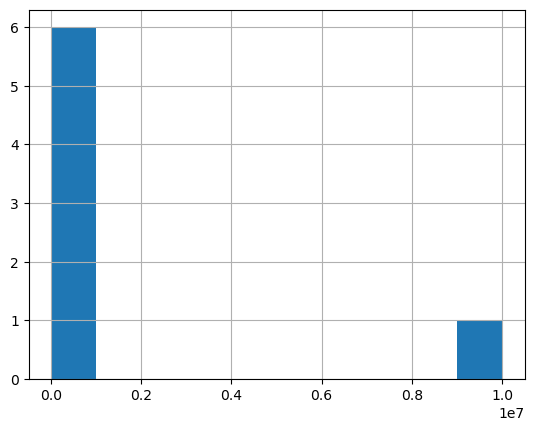

In [40]:
# Histogram calculation

df_cln.income.hist();